In [9]:
# Projet : Analyse de ventes - Data Science (pds.ipynb)
import pandas as pd # pour la manipulation de données
import numpy as np # pour les calculs numériques
import matplotlib.pyplot as plt # pour la visualisation de données
import seaborn as sns # pour la visualisation de données
from datetime import datetime # pour la manipulation de dates

In [13]:
# Chargement des données
df = pd.read_excel("../data/sales.xlsx")
df.head() # Affiche les 5 premières lignes du DataFrame


,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,Unit Cost
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.1,1824.343
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.7,1269.918
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.6,1019.874
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,USD,AXW291,29,7,6,978.2,684.740
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.3,1028.852


In [14]:
# Nettoyage
# Assurez-vous que la cellule contenant le chargement des données (CELL INDEX 1) est exécutée avant cette cellule.
if 'df' in globals(): # Vérifie si 'df' est défini
	df.drop_duplicates(inplace=True) # Supprime les doublons
	df['OrderDate'] = pd.to_datetime(df['OrderDate']) # Convertit la colonne 'OrderDate' en datetime
	df['Year'] = df['OrderDate'].dt.year # Extrait l'année
	df['Month'] = df['OrderDate'].dt.month # Extrait le mois
	df['Month_Name'] = df['OrderDate'].dt.strftime('%B') # Extrait le nom du mois
	df['Quarter'] = df['OrderDate'].dt.quarter # Extrait le trimestre
	df['DayOfWeek'] = df['OrderDate'].dt.day_name() # Extrait le jour de la semaine
else:
	print("Erreur : La variable 'df' n'est pas définie. Exécutez d'abord la cellule de chargement des données.")

In [15]:
# Table des dates
if 'df' in globals(): # Vérifie si 'df' est défini
	date_range = pd.date_range(start=df['OrderDate'].min(), end=df['OrderDate'].max()) # Crée une plage de dates
	date_df = pd.DataFrame({'Date': date_range}) # Crée un DataFrame avec la plage de dates
	date_df['Year'] = date_df['Date'].dt.year # Extrait l'année
	date_df['Month'] = date_df['Date'].dt.month # Extrait le mois
	date_df['Month_Name'] = date_df['Date'].dt.strftime('%B') # Extrait le nom du mois  
	date_df['Quarter'] = date_df['Date'].dt.quarter # Extrait le trimestre
	date_df['DayOfWeek'] = date_df['Date'].dt.day_name() # Extrait le jour de la semaine
else:
	print("Erreur : La variable 'df' n'est pas définie. Exécutez d'abord la cellule de chargement des données.")

In [16]:
# KPIs
if 'df' in globals():
	df['Sales'] = df['Order Quantity'] * df['Unit Selling Price']  # Calculate Sales
	df['Profit'] = df['Sales'] - (df['Order Quantity'] * df['Unit Cost'])  # Calculate Profit
	df['Cost'] = df['Order Quantity'] * df['Unit Cost']  # Calculate Cost

	total_sales = df['Sales'].sum() # Total Sales 
	total_profit = df['Profit'].sum() # Total Profit
	total_quantity = df['Order Quantity'].sum() # Total Quantity
	total_cost = df['Cost'].sum() # Total Cost
	profit_margin = total_profit / total_sales * 100 # Profit Margin
	sales_by_year = df.groupby('Year')['Sales'].sum() # Total Sales by Year
	profit_by_year = df.groupby('Year')['Profit'].sum() # Total Profit by Year
	sales_var = sales_by_year.diff().iloc[-1] # Sales Variation
	sales_var_pct = sales_var / sales_by_year.iloc[-2] * 100 # Sales Variation Percentage
	profit_var = profit_by_year.diff().iloc[-1] # Profit Variation
	profit_var_pct = profit_var / profit_by_year.iloc[-2] * 100 # Profit Variation Percentage
else:
	print("Erreur : La variable 'df' n'est pas définie. Exécutez d'abord la cellule de chargement des données.")

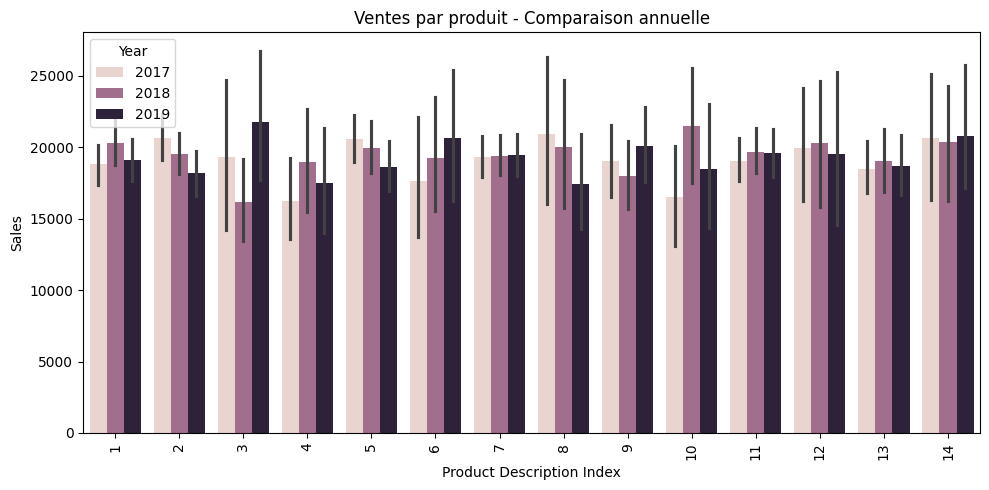

In [ ]:
# Visualisation 1 : Ventes par produit
plt.figure(figsize=(10, 5)) # Crée une figure de 10x5 pouces
sns.barplot(data=df, x='Product Description Index', y='Sales', hue='Year') # Crée un barplot
plt.title('Ventes par produit - Comparaison annuelle') # Titre du graphique
plt.xticks(rotation=90) # Rotation des étiquettes de l'axe x
plt.tight_layout() # Ajuste la mise en page
plt.show() # Affiche le graphique

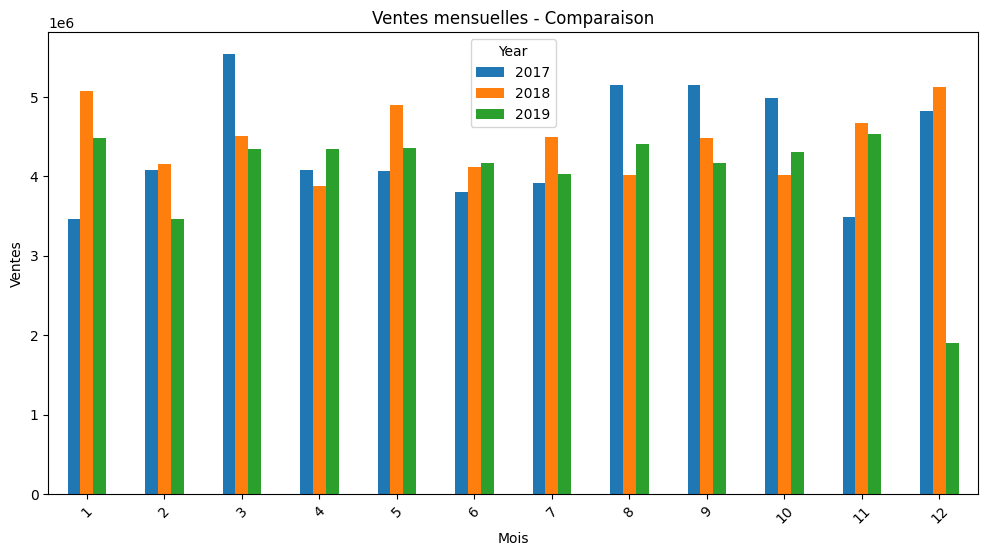

In [ ]:
# Visualisation 2 : Ventes mensuelles
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(0) # Total Sales by Month
monthly_sales.plot(kind='bar', figsize=(12, 6)) # Crée un barplot
plt.title('Ventes mensuelles - Comparaison') # Titre du graphique
plt.xlabel('Mois') # Étiquette de l'axe x
plt.ylabel('Ventes') # Étiquette de l'axe y
plt.xticks(rotation=45) # Rotation des étiquettes de l'axe x
plt.show() # Affiche le graphique

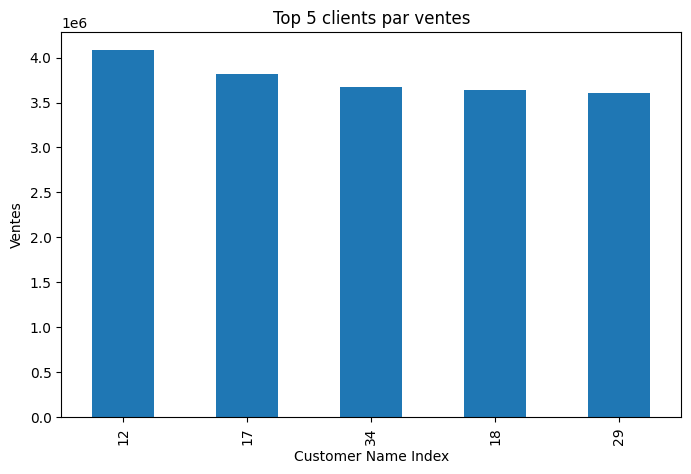

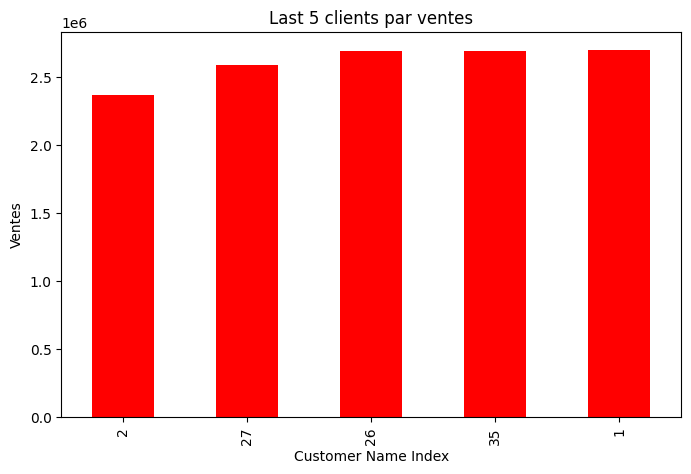

In [17]:
# Clients
top5_clients = df.groupby('Customer Name Index')['Sales'].sum().sort_values(ascending=False).head(5)
top5_clients.plot(kind='bar', title='Top 5 clients par ventes', figsize=(8, 5))
plt.ylabel('Ventes')
plt.show()
last5_clients = df.groupby('Customer Name Index')['Sales'].sum().sort_values().head(5)
last5_clients.plot(kind='bar', title='Last 5 clients par ventes', figsize=(8, 5), color='red')
plt.ylabel('Ventes')
plt.show()

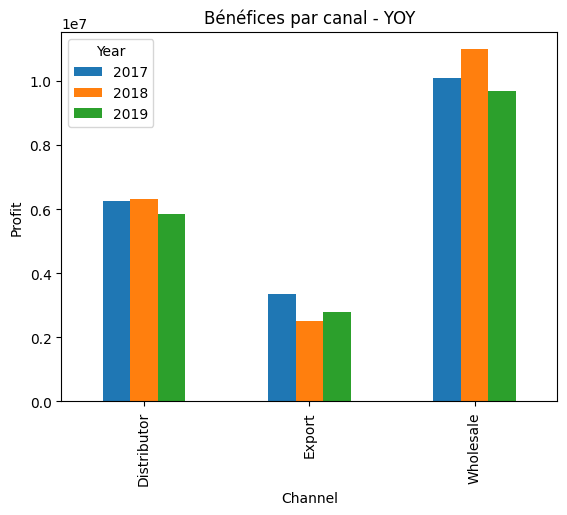

In [19]:
# Canaux de vente
channel_profit = df.groupby(['Channel', 'Year'])['Profit'].sum().unstack()
channel_profit.plot(kind='bar', title='Bénéfices par canal - YOY')
plt.ylabel('Profit')
plt.show()

In [20]:
# Résumé
print("Récapitulatif des KPIs :")
print(f"Ventes totales : {total_sales:,.2f} MAD")
print(f"Profit total : {total_profit:,.2f} MAD")
print(f"Marge bénéficiaire : {profit_margin:.2f} %")
print(f"Coût total : {total_cost:,.2f} MAD")
print(f"Variation des ventes YOY : {sales_var:,.2f} MAD ({sales_var_pct:.2f} %)")
print(f"Variation du profit YOY : {profit_var:,.2f} MAD ({profit_var_pct:.2f} %)")

Récapitulatif des KPIs :
Ventes totales : 154,573,140.60 MAD
Profit total : 57,789,142.91 MAD
Marge bénéficiaire : 37.39 %
Coût total : 96,783,997.69 MAD
Variation des ventes YOY : -4,934,717.50 MAD (-9.23 %)
Variation du profit YOY : -1,467,008.35 MAD (-7.41 %)
